In [141]:
import drawSvg as draw
import random
import math

In [177]:
xMax= 250
yMax = 250
max_radius=200
min_radius=10

In [178]:
class Circle:
    def __init__(self, x,y,r):
        self.x = x
        self.y = y
        self.r = r
    
    def toSvg(self):
        return draw.Circle(self.x,self.y,self.r, stroke_width=1,stroke='black', fill='none')
    
    def __repr__(self):
        return str((self.x, self.y, self.r))
    
    def __cmp__(self, other):
        return cmp((self.x, self.y, self.r), (other.x, other.y,other.r))
    
    def __lt__(self, other):
        return ((self.x, self.y, self.r) < (other.x, other.y,other.r))

In [179]:
def randomX():
    return random.randrange(-1*xMax,xMax)
def randomY():
    return random.randrange(-1*yMax,yMax)

In [180]:
def maxRadius(circles, x, y):
    r = max_radius
    r = min([r, xMax-abs(x),yMax-abs(y)])
    for c in circles:
        dist = math.dist((x,y),(c.x,c.y))
        r = min(dist - c.r, r)
        if r < 0:
            return -1
    return r

In [181]:
def maybeAddCircle(circles):
    x = randomX()
    y = randomY()
    r = maxRadius(circles, x, y)
    if r > min_radius:
        circles.append(Circle(x,y,r))

In [182]:
circles = []
for i in range(10000):
    maybeAddCircle(circles)

In [183]:
len(circles)

100

In [184]:
print(circles[0].x,circles[0].y,circles[0].r)


-91 160 90


In [185]:
print(circles[0])

(-91, 160, 90)


In [186]:

circles.sort()

In [187]:
print(circles[0].x,circles[0].y,circles[0].r)

-239 149 11


In [188]:
d = draw.Drawing(xMax*2, yMax*2, origin='center')
for c in circles:
    d.append(c.toSvg())

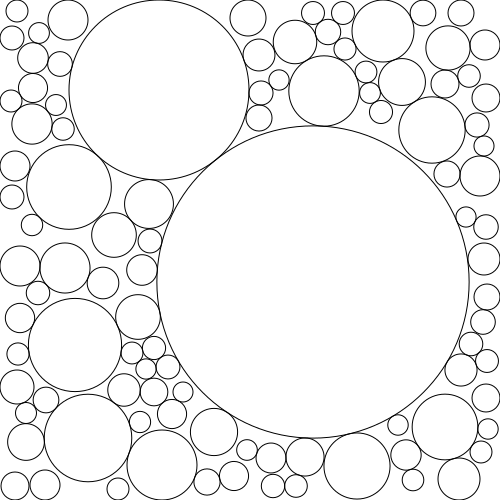

In [189]:
# Display in Jupyter notebook
d.rasterize()  # Display as PNG
d  # Display as SVG

In [190]:
d.saveSvg('packed.svg')

In [191]:
help(draw)

Help on package drawSvg:

NAME
    drawSvg

DESCRIPTION
    A library for creating SVG files or just drawings that can be displayed in
    iPython notebooks
    
    Example:
    ```
        d = draw.Drawing(200, 100, origin='center')
    
        d.append(draw.Lines(-80, -45,
                            70, -49,
                            95, 49,
                            -90, 40,
                            close=False,
                    fill='#eeee00',
                    stroke='black'))
    
        d.append(draw.Rectangle(0,0,40,50, fill='#1248ff'))
        d.append(draw.Circle(-40, -10, 30,
                    fill='red', stroke_width=2, stroke='black'))
    
        p = draw.Path(stroke_width=2, stroke='green',
                      fill='black', fill_opacity=0.5)
        p.M(-30,5)  # Start path at point (-30, 5)
        p.l(60,30)  # Draw line to (60, 30)
        p.h(-70)    # Draw horizontal line to x=-70
        p.Z()       # Draw line to start
        d.append(p)
    

In [192]:
help(draw.Path)

Help on class Path in module drawSvg.elements:

class Path(DrawingBasicElement)
 |  Path(d='', **kwargs)
 |  
 |  An arbitrary path
 |  
 |  Path Supports building an SVG path by calling instance methods
 |  corresponding to path commands.
 |  
 |  Additional keyword arguments are output as additional properties to the
 |  SVG node e.g. fill="red", stroke="#ff4477", stroke_width=2.
 |  
 |  Method resolution order:
 |      Path
 |      DrawingBasicElement
 |      DrawingElement
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  A(self, rx, ry, rot, largeArc, sweep, ex, ey)
 |  
 |  C(self, cx1, cy1, cx2, cy2, ex, ey)
 |  
 |  H(self, x)
 |  
 |  L(self, x, y)
 |  
 |  M(self, x, y)
 |  
 |  Q(self, cx, cy, ex, ey)
 |  
 |  S(self, cx2, cy2, ex, ey)
 |  
 |  T(self, ex, ey)
 |  
 |  V(self, y)
 |  
 |  Z(self)
 |  
 |  __init__(self, d='', **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  a(self, rx, ry, rot, largeArc, sweep, ex, ey)
